<a href="https://colab.research.google.com/github/emmacampo/Supervised_Learning_Classification_Project/blob/main/AllLifeBank_PersonalLoanCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to suppress warnings or deprecation notes
import warnings

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split the data into train and test
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats
# To get diferent metric scores
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
    f1_score
)
from sklearn.metrics import confusion_matrix

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Loan_Modelling.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape

(5000, 14)

We have 5000 rows and 14 columns to work with in this dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Our 14 columns have 5000 non-null values. There are 13 integer columns and 1 float column ('CCAvg').

In [ ]:
# checking for duplicate values in the data
data.duplicated().sum()

0

There are no duplicates in this data.

In [ ]:
df = data.copy()

I am making a copy to avoid any changes in the original data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations and Sanity Checks**

*  We are working with 5000 rows and 14 columns. There are 13 integer and 1 float datatypes in this dataset.
*  No duplicated nor missing values.
*  Copy made to avoid changes to original dataset.
*  CSV file appears to have loaded correctly.
*   The Personal_Loan, Securities_Account, CD_Account, Online, CreditCard and Education columns are in fact categorical and need to be converted.
*   The mean client: A 45 year old, with 20 years of professional work experience, an income of 73 000 USD, family size of 2, 1900 USD in Credit Card, a mortgage of $56 000 and is most likely utalizing the online banking facilities.
*   The min, 25th, 50th and 75th percentile of our clients declined the previous personal loan offer.
*  We have an age range of 23-67, and the Experience variable ranges between -3 and 43 years (the -3 is clearly incorrect and will be investigated further).
* The income also ranges between 8000 USD and 224 000 USD, suggesting that we are working with a broad spectrum of clients. This range in our data confirms that market segmentation with an ML model can be useful to increase success ratio of future marketing campaigns.
* 25% of the clients currently have a Credit Card account elsewhere. This appears to be an important attribute for this analysis.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

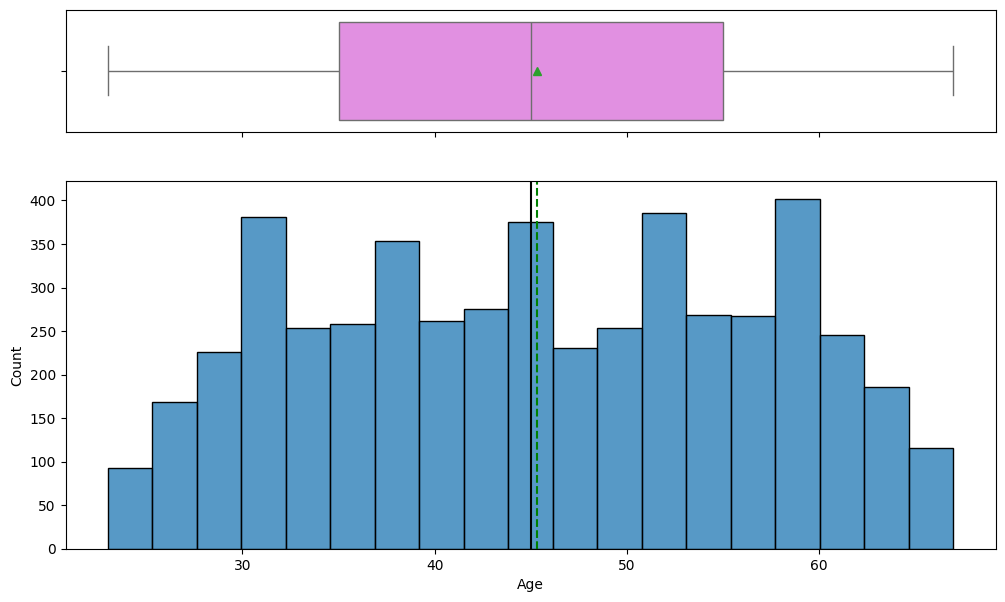

In [ ]:
histogram_boxplot(df,"Age")
plt.show()

The median age is around 45. There are multiple peaks, suggesting a wide age range.

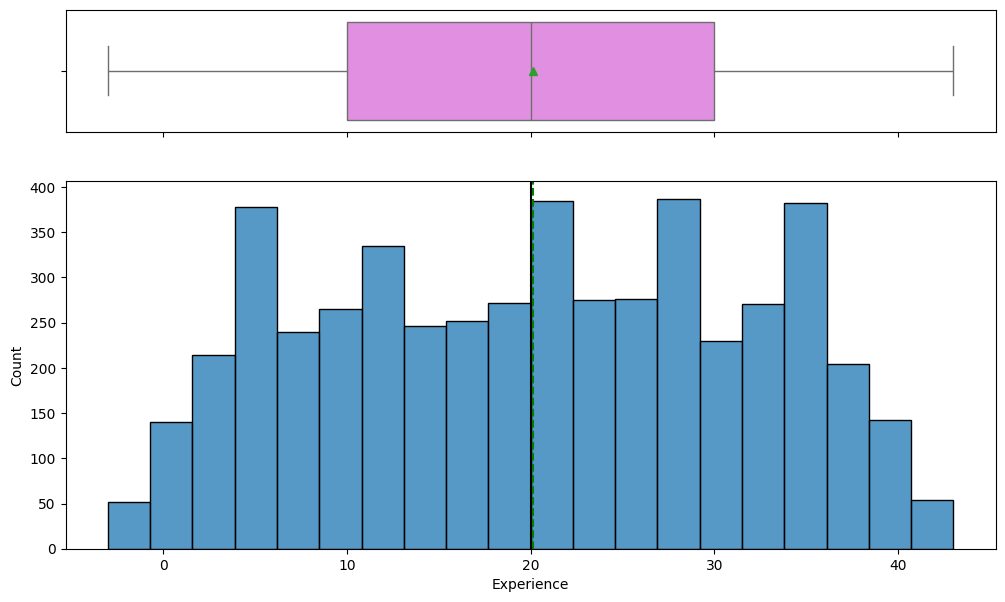

In [ ]:
histogram_boxplot(df,"Experience")
plt.show()

The median years of professional experience is 20 years. We see that the graph is multi-modal, with peaks around 5, 11, 20+, 28 and 35 years, respectivelt.The client base ranges between -0 and 40+ years of professinal work experience. Obviously, the -0 range is inaccurate.

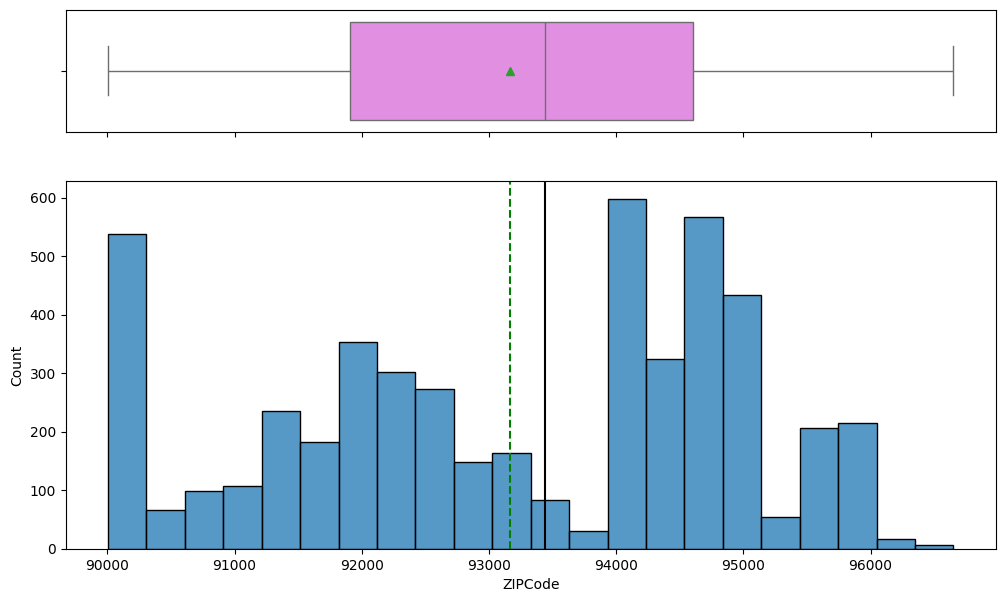

In [ ]:
histogram_boxplot(df,"ZIPCode")
plt.show()

While this doesn't provide a lot of insight we can see where the peaks are, hence, the most frequent zip codes of the client base.

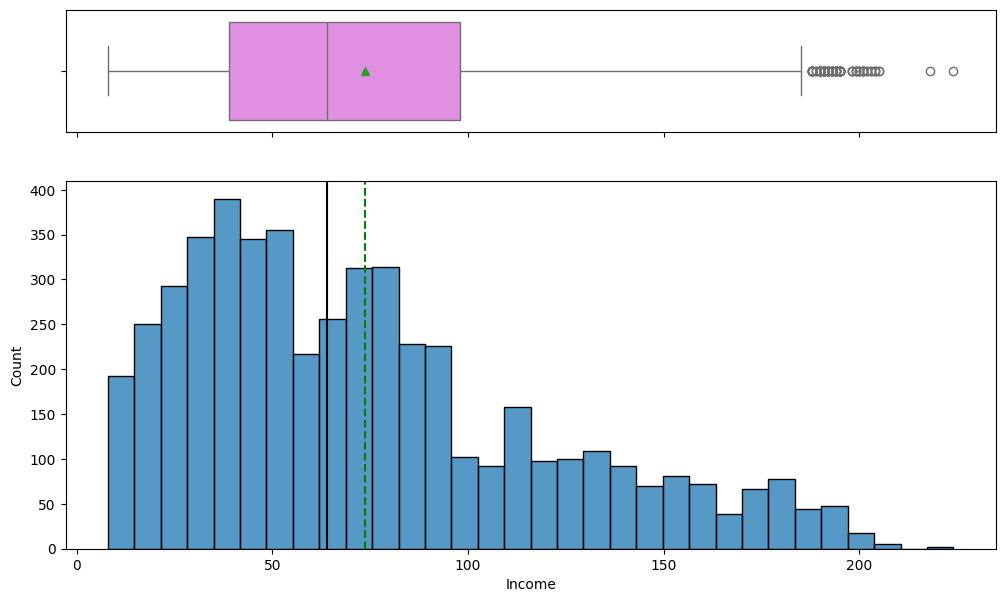

In [ ]:
histogram_boxplot(df,"Income")
plt.show()

The income graph is right-skewed, with a median income in the 65-70k/year range. We can speculate that the higher income bracket are not the main target market for AllLife Bank.

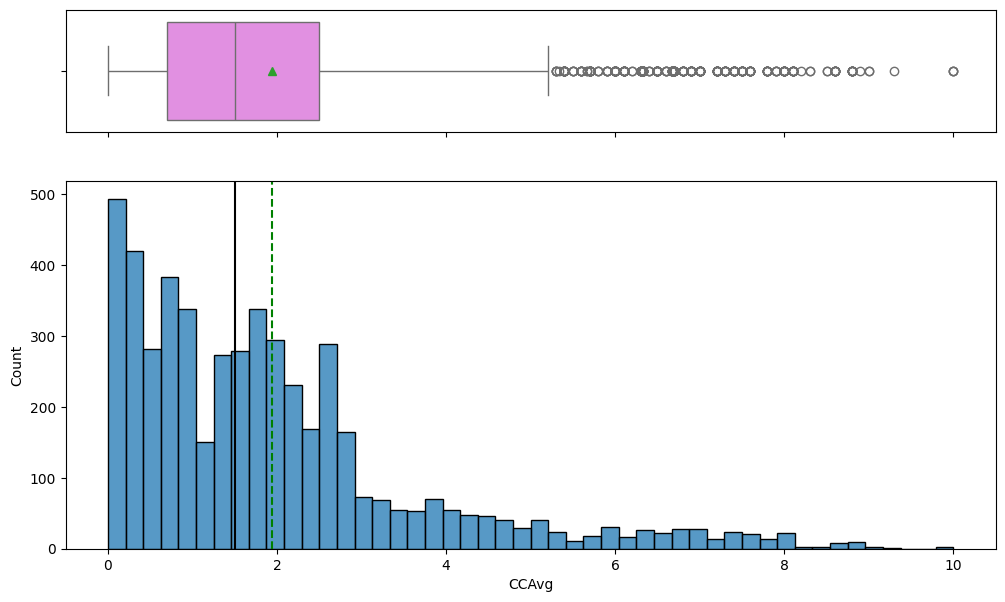

In [ ]:
histogram_boxplot(df,"CCAvg")
plt.show()

We have a noticable amount of outliers in this column (right-skewed). The median monthly spending with CC are just shy of 2k/month. However, the graph does suggest that customers also spend over this amount and this must be taken into account for this analysis.

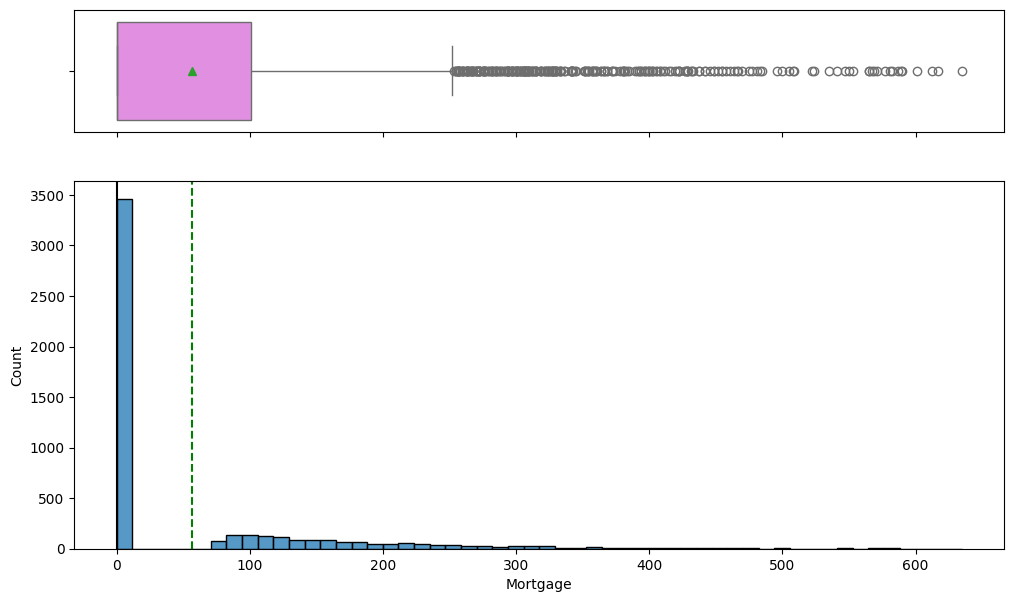

In [ ]:
histogram_boxplot(df,"Mortgage")
plt.show()

In [ ]:
df['Mortgage'].value_counts(normalize=True) * 100

0      69.24
98      0.34
119     0.32
89      0.32
91      0.32
       ...  
547     0.02
458     0.02
505     0.02
361     0.02
541     0.02
Name: Mortgage, Length: 347, dtype: float64

In [ ]:
Top_Mortg=df['Mortgage'].value_counts()[:5]
print(Top_Mortg)

0      3462
98       17
119      16
89       16
91       16
Name: Mortgage, dtype: int64


We have 3462 clients with 0 mortgage value. This amounts to 69% of the clients. With a high percentage of 0 value in mortgages, this could be beneficial information for future marketing campaigns. This could mean that the clients don't currently own a home (alternative to this would be renting), or they have paid off their mortgage. Since it is heavily skewed, I am considering convering this column to categorical, with 0 being "no mortgage" and 1 being the value for someone with a "mortgage".

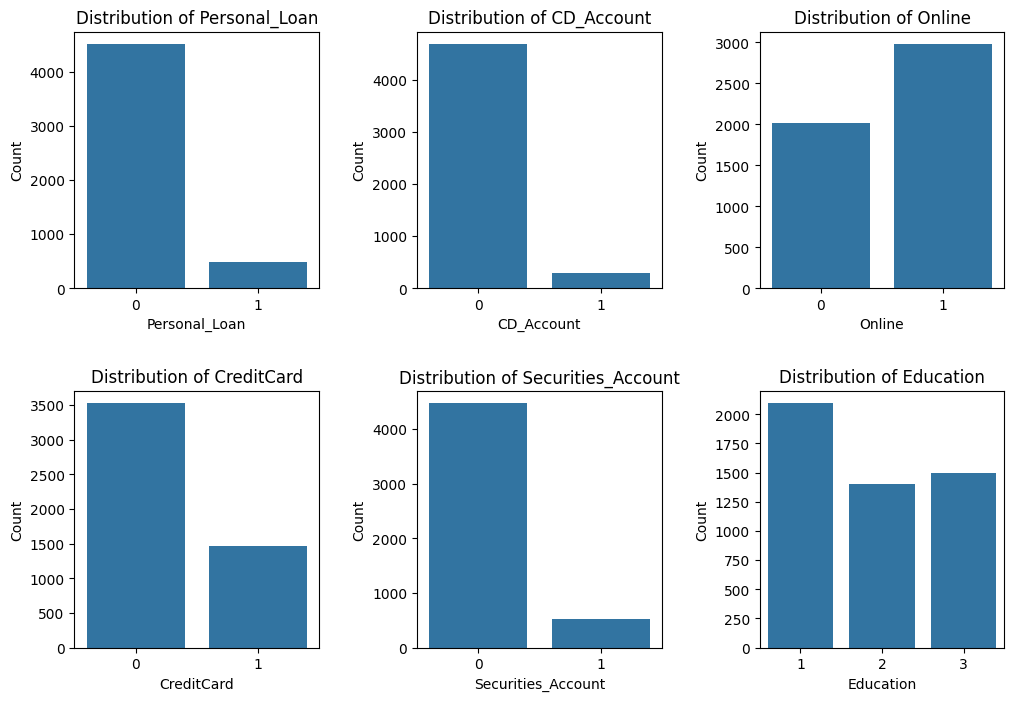

In [ ]:
data_to_explore = ['Personal_Loan', 'CD_Account', 'Online', 'CreditCard', 'Securities_Account', 'Education']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axes = axes.flatten()
# Creating count plots for variables in data_to_explore
for i, variable in enumerate(data_to_explore):
    sns.countplot(data=df, x=variable, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')

*   Personal Loan: only a small (ca 400) amount of client base currently have personal loans.
*   CD Account: A small proportion of AllLife Bank's clients have a CD_Account.
*   Online: Ca 2800 clients utilize their online banking service.
*   Credit Card: 1470 clients have credit cards elsewhere, but 3530 clients do not have a Credit Card account at all.
*   The distribution of education levels among individuals shows a predominant trend towards undergraduate education. Notably, approximately 38% of U.S. undergraduates pursue postgraduate studies, as reported by the Pew Research Center. This suggests that this might not be a trend specific to AllLife Bank.







In [ ]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

We can also infer from this analysis that 1470 clients pay interest on Credit Cards, suggesting that this is not a concern for the clients whom have a Credit Card account elsewhere.

In [ ]:
# Calculating the count and percentage of the two categories in the 'Personal_Loan' column
loan_counts = df['Personal_Loan'].value_counts()
loan_percentages = (loan_counts / len(df)) * 100

print(loan_counts)
print(loan_percentages)

0    4520
1     480
Name: Personal_Loan, dtype: int64
0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


480 clients (9.6%) were converted during the previous loan campaign. This success suggests that there is genuine interest in loan products offered by banks, and understanding the different segments of their database will be tremendously beneficial.

In [ ]:
# Calculating the count and percentage of the three categories in the 'Education' column
education_counts = df['Education'].value_counts()
education_percentages = (education_counts / len(df)) * 100

print(education_counts)
print(education_percentages)

1    2096
3    1501
2    1403
Name: Education, dtype: int64
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64


42% (2096) clients belong to the undergrad category, while 28% (1403) and 30% (1501) belong to the postgrad and professional categories, respectively.

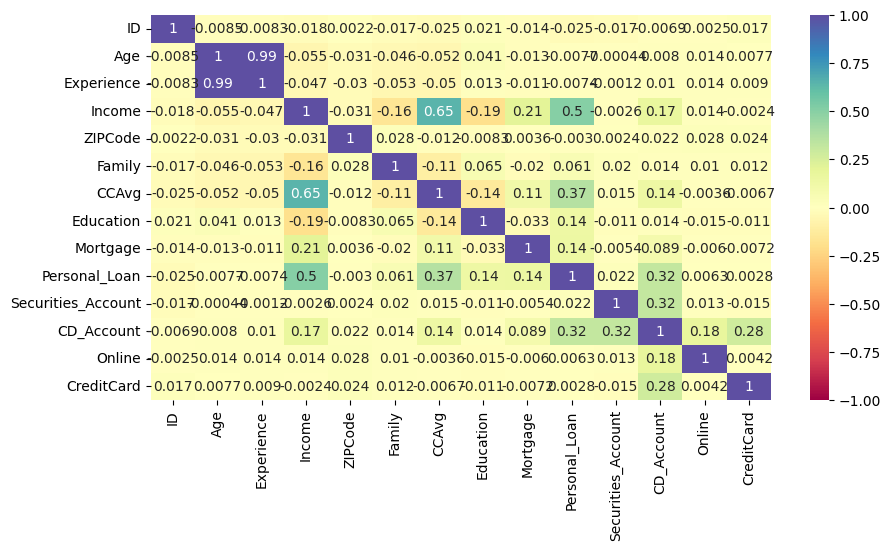

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral', vmin=-1, vmax=1);
plt.show()

*  A notable and immediate observation is the correlation between Experience and Age. Removing one of these correlated variables can help mitigate multicollinearity.
*   CCAvg and Income also have a strong correlation which seems logical given that higher income brackets usually have hugher budgets (even for Credit Card use).
*   Personal_Loan and Income also has a correlation of 0.5, indicating that a higher income bracket can impact Personal Loan conversion.
*   Slightly less significant (while still important for predicting our target variable) are Securities_Account and CD_Account. Having a Securities Account and a Certificate of Deposit with AllLife Bank can impact the decision making process for a client.
*   Both Education and Mortgage have a correlation value of 0.14 with our target attribute. We can infer that clients with a higher education level and higher mortgage values were 14% more likely to accept the previous personal loan offer.

<Axes: xlabel='Personal_Loan', ylabel='Age'>

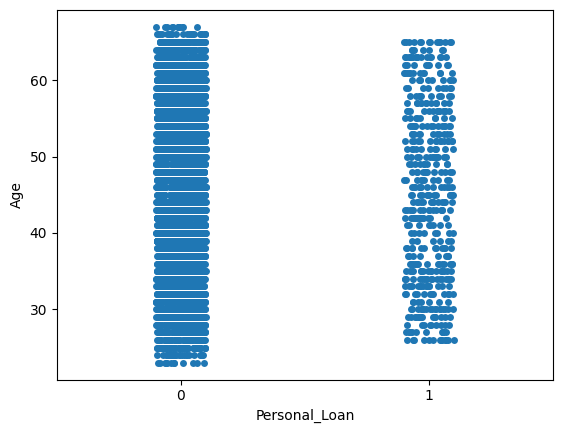

In [ ]:
sns.stripplot(data=df,x='Personal_Loan',y='Age',jitter=True)

<Axes: xlabel='Personal_Loan', ylabel='Age'>

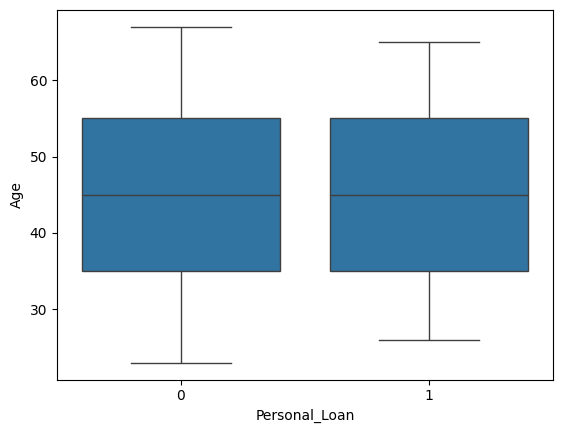

In [ ]:
sns.boxplot(data=df, x='Personal_Loan', y='Age')

<Axes: xlabel='Personal_Loan', ylabel='count'>

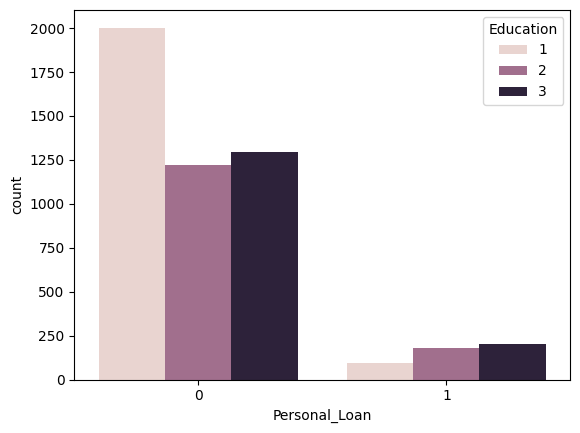

In [ ]:
sns.countplot(data=df, x='Personal_Loan', hue='Education')

**Questions**:

1. **What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

The distribution of the 'Mortgage' attribute is heavily right-skewed, indicating that the majority of clients have relatively low mortgage values. Additionally, there are noticeable outliers in the data, suggesting that some clients have significantly higher mortgage amounts compared to the majority. The distribution pattern implies that a significant portion of clients may not have a mortgage or have very low mortgage values, while a smaller group of clients has high mortgage amounts.
2. **How many customers have credit cards?**

A total of 1470 clients hold credit cards with another bank.

3.  **What are the attributes that have a strong correlation with the target attribute (personal loan)?**

Income (0.5), CCAvg (0.37) and CD_Account (0.32), respectively, are the 3 attributes with a notable correlation to our target attribute, Personal Loan.Education and Mortgage have a smaller correlation, both at 0.14.

4. **How does a customer's interest in purchasing a loan vary with their age?**

The majority of clients declined the previous offer or promotion related to loans. However, loan acquisition is observed in a narrower age-range (between 25 and 65) as seen in the boxplot and strip plot above. This suggests that age, while a factor, is not a notable determinant in a customer's decision to explore loan options.

5. **How does a customer's interest in purchasing a loan vary with their education?**

Education level appears to have a noticeable impact on our dependent variable, Personal_Loan. Higher education is a factor in a customer's interest in acquiring a loan, while undergraduate education is associated with a higher likelihood of declining the offer. It's important to note that undergraduate education represents a substantial portion of our client base, accounting for 42%, which is significantly higher than the post-graduate and advanced/professional education levels.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#let's check for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

As we discovered earlier, there are no missing values in the data.

In [ ]:
# dropping the ID column
df = df.drop(["ID"], axis=1)

I am dropping "ID" since this data is not necessary for predicting my variable y.

In [ ]:
df["ZIPCode"].nunique()

467

We have two choices- we either drop the ZIPCode column or we transform these values to only include the first 3 digits to enable relevancy. I am transforming ZIPCode because I think it can add value to my model.

In [ ]:
print(df["ZIPCode"].dtype)

int64


In [ ]:
#Converting this variable to str as ZIP codes are typically stored as strings
df["ZIPCode"] = df["ZIPCode"].astype(str)

In [ ]:
# Converting column to only include first three characters of each ZIP code in the "ZIPCode" column.
df["ZIPCode"] = df["ZIPCode"].str[:2]

The ZIPCode column has been converted to a string and must now be preprocessed to a dummy variable. The above conversion would only allow str type.

In [ ]:
#creating dummy variables for the ZIPCode column
df = pd.get_dummies(df, columns=["ZIPCode"], drop_first=True)

In [ ]:
# Converting the Mortgage column to categorical '1' (yes) and '0' (no)
df['Mortgage'] = df['Mortgage'].apply(lambda x: '1' if x != 0 else '0').astype('category')

I've chosen to transform the 'Mortgage' column into a categorical variable because I believe it will enhance the interpretability of my Decision Tree Model. Clients without mortgages will be grouped into a single category, given that the majority fall into this group. Similarly, positive mortgage values will be grouped together into their own distinct category rather than being treated as separate individual values.

In [ ]:
#creating a list and converting the below integer values to categorical data type.
cat =[
    "Personal_Loan",
    "CD_Account",
    "Online",
    "Securities_Account",
    "CreditCard",
    "Education",
]
df[cat] = df[cat].astype("category")

After experimentation, I have decided to convert Income and CCAvg to categorical. The context will be clearer and since this is for marketing purposes, categories will be more beneficial. To do this, I am creating 3 categories for 'Income': 'Up to 50', '50-100', '100-150'. I will be replacing all other values with the median as I don't want to drop too many rows since that would result in less data to work with. This will result in creating dummy variables for these two variables.

In [ ]:
median_income = df['Income'].median()

# Impute values exceeding 150 with the median
df['Income'] = df['Income'].apply(lambda x: median_income if x > 150 else x)

In [ ]:
# Creating a function to categorize the Income column
def categorize_income(income):
    if income <= 50:
        return 'Up to 50'
    elif 50 < income <= 100:
        return '50 to 100'
    elif 100 < income <= 150:
        return '100 to 150'

# Replacing the 'Income' column with categorical values
df['Income'] = df['Income'].apply(categorize_income).astype('category')

In [ ]:
#creating dummy variables for the Income column
df = pd.get_dummies(df, columns=["Income"], drop_first=True)

In [ ]:
# Calculating the median of the 'CCAvg' column
median_ccavg = df['CCAvg'].median()

# Replacing values exceeding 6 with the median
df['CCAvg'] = np.where(df['CCAvg'] > 6, median_ccavg, df['CCAvg'])

# Creating a function to categorize CCAvg
def categorize_ccavg(ccavg):
    if ccavg == 0:
        return '0'
    elif 0 < ccavg <= 2:
        return 'Above 0 to 2'
    elif 2 < ccavg <= 4:
        return '2-4'
    elif 4 < ccavg <= 6:
        return '4-6'
    else:
        return 'Other'

# Replace the 'CCAvg' column with categorical values
df['CCAvg'] = df['CCAvg'].apply(categorize_ccavg).astype('category')

# Drop rows where 'CCAvg' values are 'Other'
df.drop(df[df['CCAvg'] == 'Other'].index, inplace=True)

In [ ]:
#creating dummy variables for the CCAvg column
df = pd.get_dummies(df, columns=["CCAvg"], drop_first=True)

In [ ]:
#Dropping 'Experience' due to Age and Experience having a 0.9 correlation
X = df.drop(["Personal_Loan", "Experience"], axis=1)
y = df["Personal_Loan"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
df.shape

(5000, 21)

We can now see that we are working with the same amount of rows (5000) since we treated the outliers appropriately and categorized the Income and CCAvg columns. We do have more columns to work with (21) since we are using dummy variables for CCAvg, Income and ZIPCode

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3000
Number of rows in test data = 2000


## Model Building

### Model Evaluation Criterion
 In this context, my objective is to develop models that facilitate market segmentation for the purpose of improving conversion rates in future marketing campaigns for AllLife Bank.

Key Objective: Conversion Rate Optimization

My primary goal is to enhance conversion rates, specifically, the rate at which liability customers are successfully converted into personal loan customers while retaining them as depositors. To achieve this objective, I must identify customer segments with the highest potential for successful conversion.

The Significance of Recall:

In the context of my marketing campaign, recall holds particular importance. Recall, also known as the true positive rate, measures the model's ability to correctly identify positive instances. In my case, a positive instance signifies a customer who is likely to accept the personal loan offer. Maximizing recall means identifying as many potential personal loan customers as possible.

The Importance of Minimizing False Negatives (FN):

False negatives (FN) occur when the model mistakenly predicts that a customer will not accept the personal loan offer when they actually would. In my context, this represents a missed opportunity for conversion. Minimizing FN is crucial because it directly impacts my campaign's success. A low FN rate ensures that I don't overlook potential personal loan customers, ultimately leading to higher conversion rates.

Selecting the Right Model Criterion:

Given my objective of optimizing conversion rates, minimizing FN, and maximizing recall, I will choose a model criterion that aligns with these goals. I recognize that the decision tree models I build will play a pivotal role in achieving my objectives. Therefore, I will employ a criterion that not only helps identify potential personal loan customers effectively but also minimizes the risk of FN.

In summary, my model evaluation criterion for this marketing campaign is centered around optimizing conversion rates, minimizing false negatives, and maximizing recall. I will carefully select a model criterion that supports these objectives and ensures that my decision tree models are well-suited to facilitate market segmentation for future marketing campaigns.

### Model Building

Using two functions here- model_performance_classification_sklearn for model performance and metrics, and confusion_metrics_sklearn for confusin matrix to assess FP, TP, FN and TN on the models.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    performance_metrics = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return performance_metrics

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

I am creating my first decision tree classification model called model1. It uses the "gini" criterion to decide how to split the data while building the tree.

In [ ]:
model1 = DecisionTreeClassifier(criterion="gini", random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
model1_train = model_performance_classification_sklearn(model1, X_train, y_train)
print(model1_train)

   Accuracy    Recall  Precision        F1
0     0.999  0.989547        1.0  0.994746


As we can see above, the metrics show that the model is doing a very satisfactory job with Accuracy, Recall, Precision and F1.

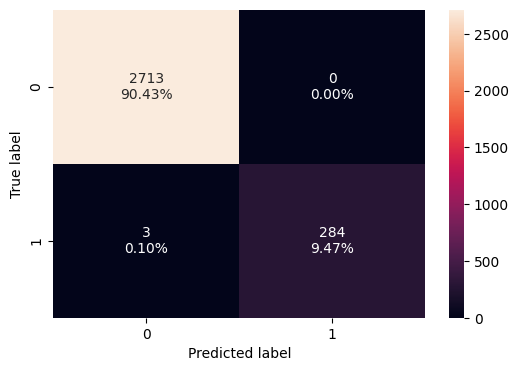

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

Accuracy: A score of 0.999 means that the model correctly predicted the class label for approximately 99.9% of the samples provided in the training set.
Recall:In this case, a recall of 0.989547 indicates that the model correctly identified approximately 98.95% of the actual positive instances.
Precision: A precision of 1.0 suggests that all positive predictions made by the model were correct. It means that when the model predicted a positive class, it was always correct.
F1 Score: The F1-score is the harmonic mean of precision and recall.

The confusion matrix shows us that in 90.43% of the cases during training, our model predicted correctly when predicting a negative outcome (not accepting the promotion). It also predicted correctly in 9.47% of the cases when the outcome was positive, as in the attribute of converting a client was in fact true.

Now, let's check the test sets to determine how it performed on the test data.

In [ ]:
DecisionTreeClassifier(criterion="gini", random_state=1)
model1.fit(X_test, y_test)

DecisionTreeClassifier(random_state=1)

In [ ]:
model1_test=model_performance_classification_sklearn(model1, X_test, y_test)
print(model1_test)

   Accuracy    Recall  Precision        F1
0    0.9995  0.994819        1.0  0.997403


Accuracy: An accuracy of 0.99 means that the model correctly predicted the class labels correctly almost seamlessly.
Recall: A recall of 0.99 indicates that the model is missing a significant portion of actual positive instances. In other words, it has a high rate of false negatives.
Precision: A precision of 1 shows that the model gave precise outcomes to the test set.
F1 Score: An F1-score of 0.99. .

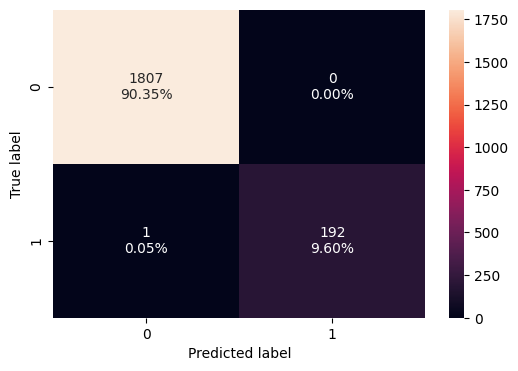

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

The confusion matrix shows us that in 90% of the cases during training, our model predicted correctly when predicting a negative outcome (not accepting the promotion). Interestingly, there were no FP in this sample. It predicted correctly on 192 samples that were True Positives, and only 1 sample was wrongly labeled as a negative. The outcome almost appears overly fitted. Perhaps we need to see just how complex this tree is. The key takeaway here is that the high accuracy is driven by the model's ability to predict the majority class correctly. The high number of true negatives (correct predictions for the majority class) contributes significantly to the accuracy.
It is clear that we need to create other models to do a wholesome comparison.

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Family', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Income_50 to 100', 'Income_Up to 50', 'CCAvg_2-4', 'CCAvg_4-6', 'CCAvg_Above 0 to 2']


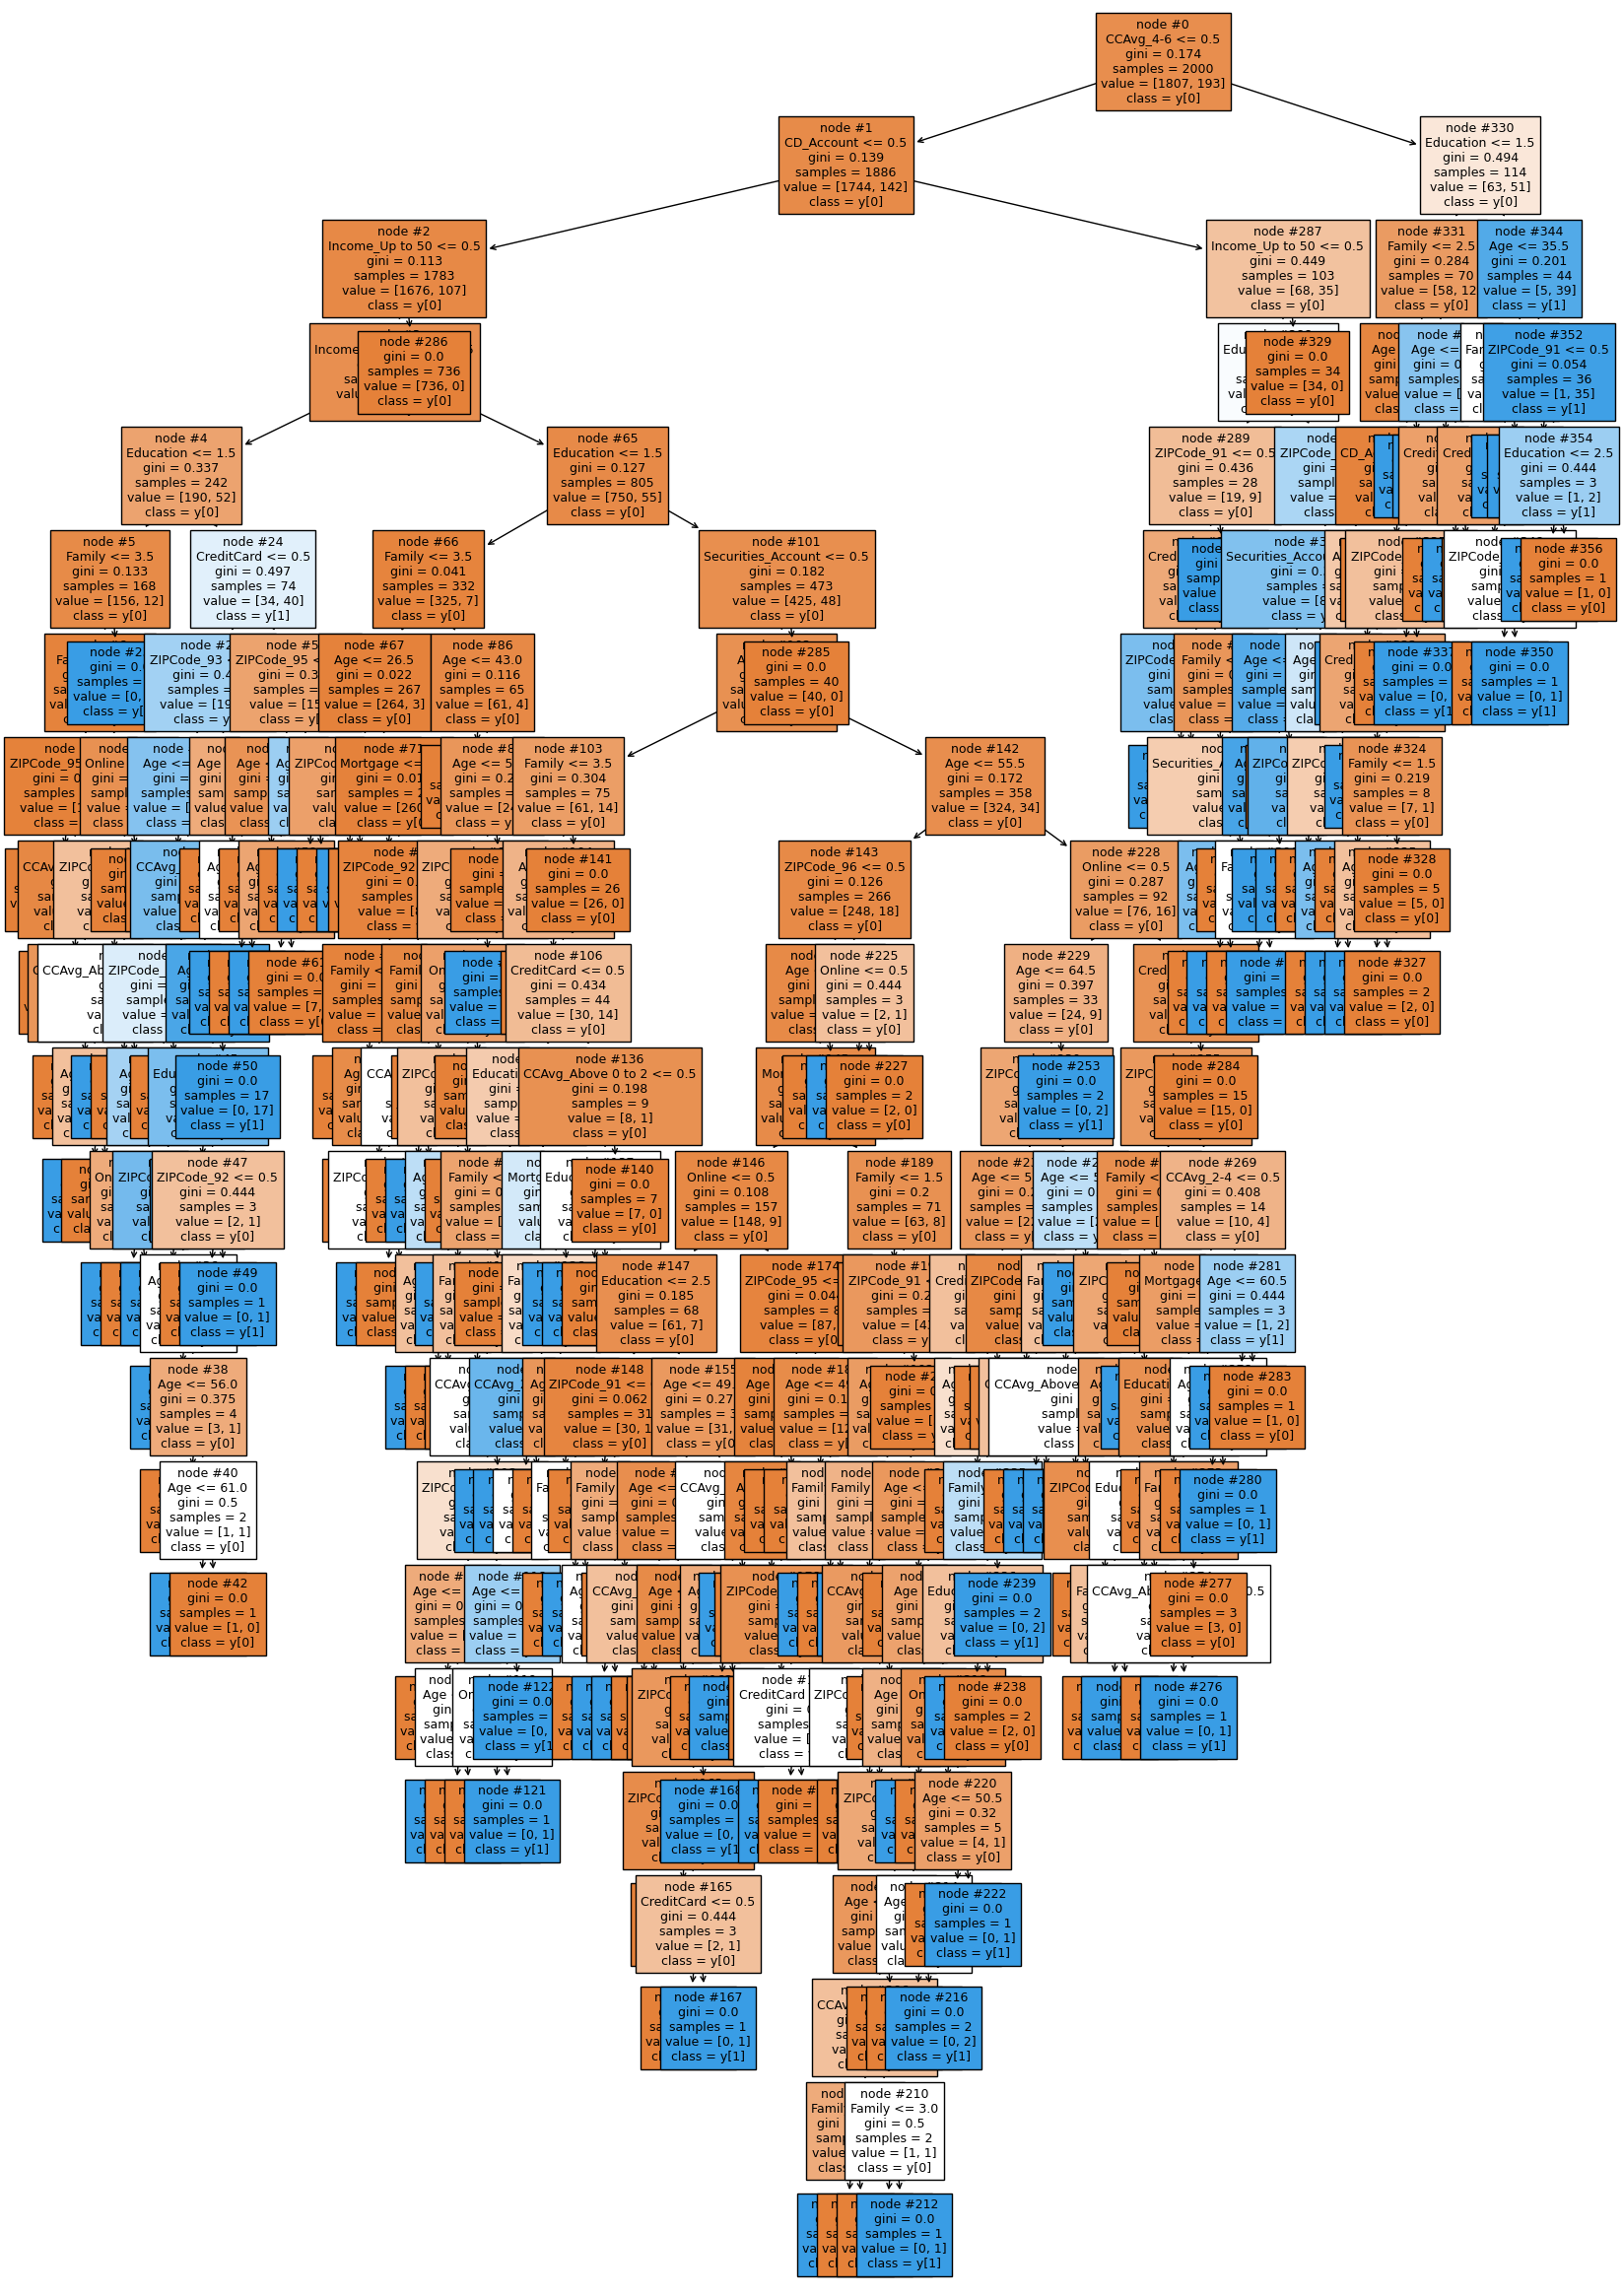

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

As we predicted, this model is overly complex hence, the outcome we received in the above confusion matrix tables. Let's lastly take a look at the most important attribtes in model1:

Let's attempt a new model with hyperparameters.I will use the GridSearchCV function here to find the best hyperparameters for my model2.

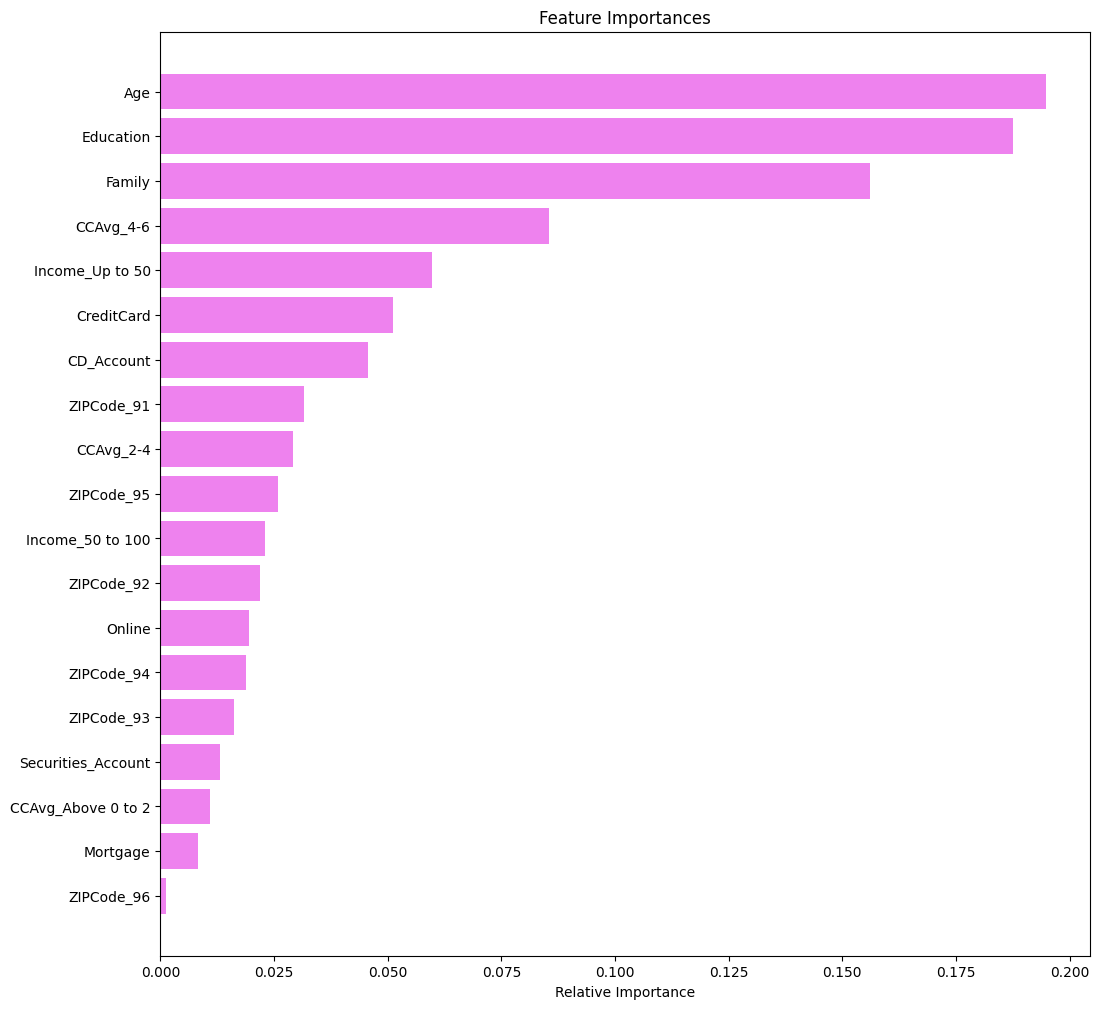

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Age, Education, Family and CCAvg_4-6 are the main attributes for this tree. We can see that 19 attributes are playing a factor here.


**Model2**
**Pre-Pruning**

Adding hyperparameters: max_depth, min_samples_split, min_samples_leaf and criterion

In [ ]:
# Defining the hyperparameter grid to search over
param_grid = {
    'max_depth': [5,8, 6,],
    'min_samples_split': [5,8, 10],
    'min_samples_leaf': [5,8, 10],
    'criterion': ['gini', 'entropy'],
}
class_weights = {0: 1, 1: 9}

# Creating the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=1, class_weight=class_weights)

# Creating a grid search object with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fitting the grid search to the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
model2 = grid_search.best_estimator_

In [ ]:
model2 = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    criterion=best_params['criterion'],
    random_state=1,
    class_weight=class_weights
)
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 9}, criterion='entropy',
                       max_depth=5, min_samples_leaf=10, min_samples_split=5,
                       random_state=1)

In [ ]:
model2_train = model_performance_classification_sklearn(model2, X_train, y_train)
print(model2_train)

   Accuracy   Recall  Precision        F1
0  0.877667  0.84669   0.429329  0.569754


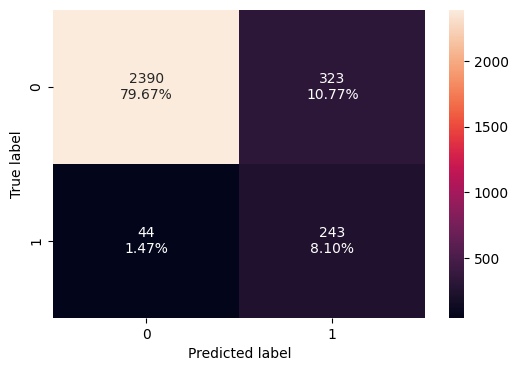

In [ ]:
confusion_matrix_sklearn(model2, X_train, y_train)

Model2 is giving us different results than Model1. Here, both accuracy and recall are satisfactory (87 and 84, respectively. However, we do have an issue with Precision and F1. We can see from the confusion matrix that over 12% of these samples were incorrectly labeled. A false negative is not optimal in our case (44 samples) and incorrectly labelling as such can result in incorrect segmentation. The model also predicted False Positives 323 times. Predicting Positives incorrectly is not as consequential as a False negative in our case.

In [ ]:
model2.fit(X_test, y_test)

DecisionTreeClassifier(class_weight={0: 1, 1: 9}, criterion='entropy',
                       max_depth=5, min_samples_leaf=10, min_samples_split=5,
                       random_state=1)

In [ ]:
model2_test=model_performance_classification_sklearn(model2, X_test, y_test)
print(model2_test)

   Accuracy    Recall  Precision        F1
0    0.7095  0.974093   0.246073  0.392894


our Accuracy and Recall are showing optimistic results.

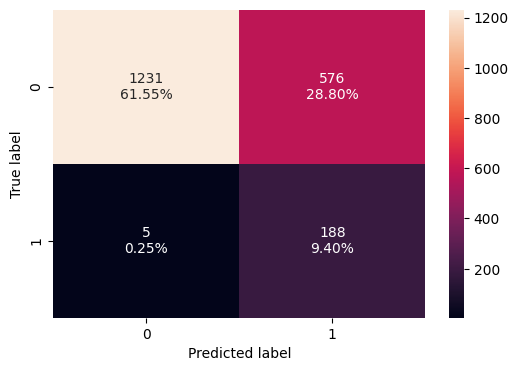

In [ ]:
confusion_matrix_sklearn(model2, X_test, y_test)

We have 526 fale positives, but only a 5 false negatives. Let's visualize the tree:

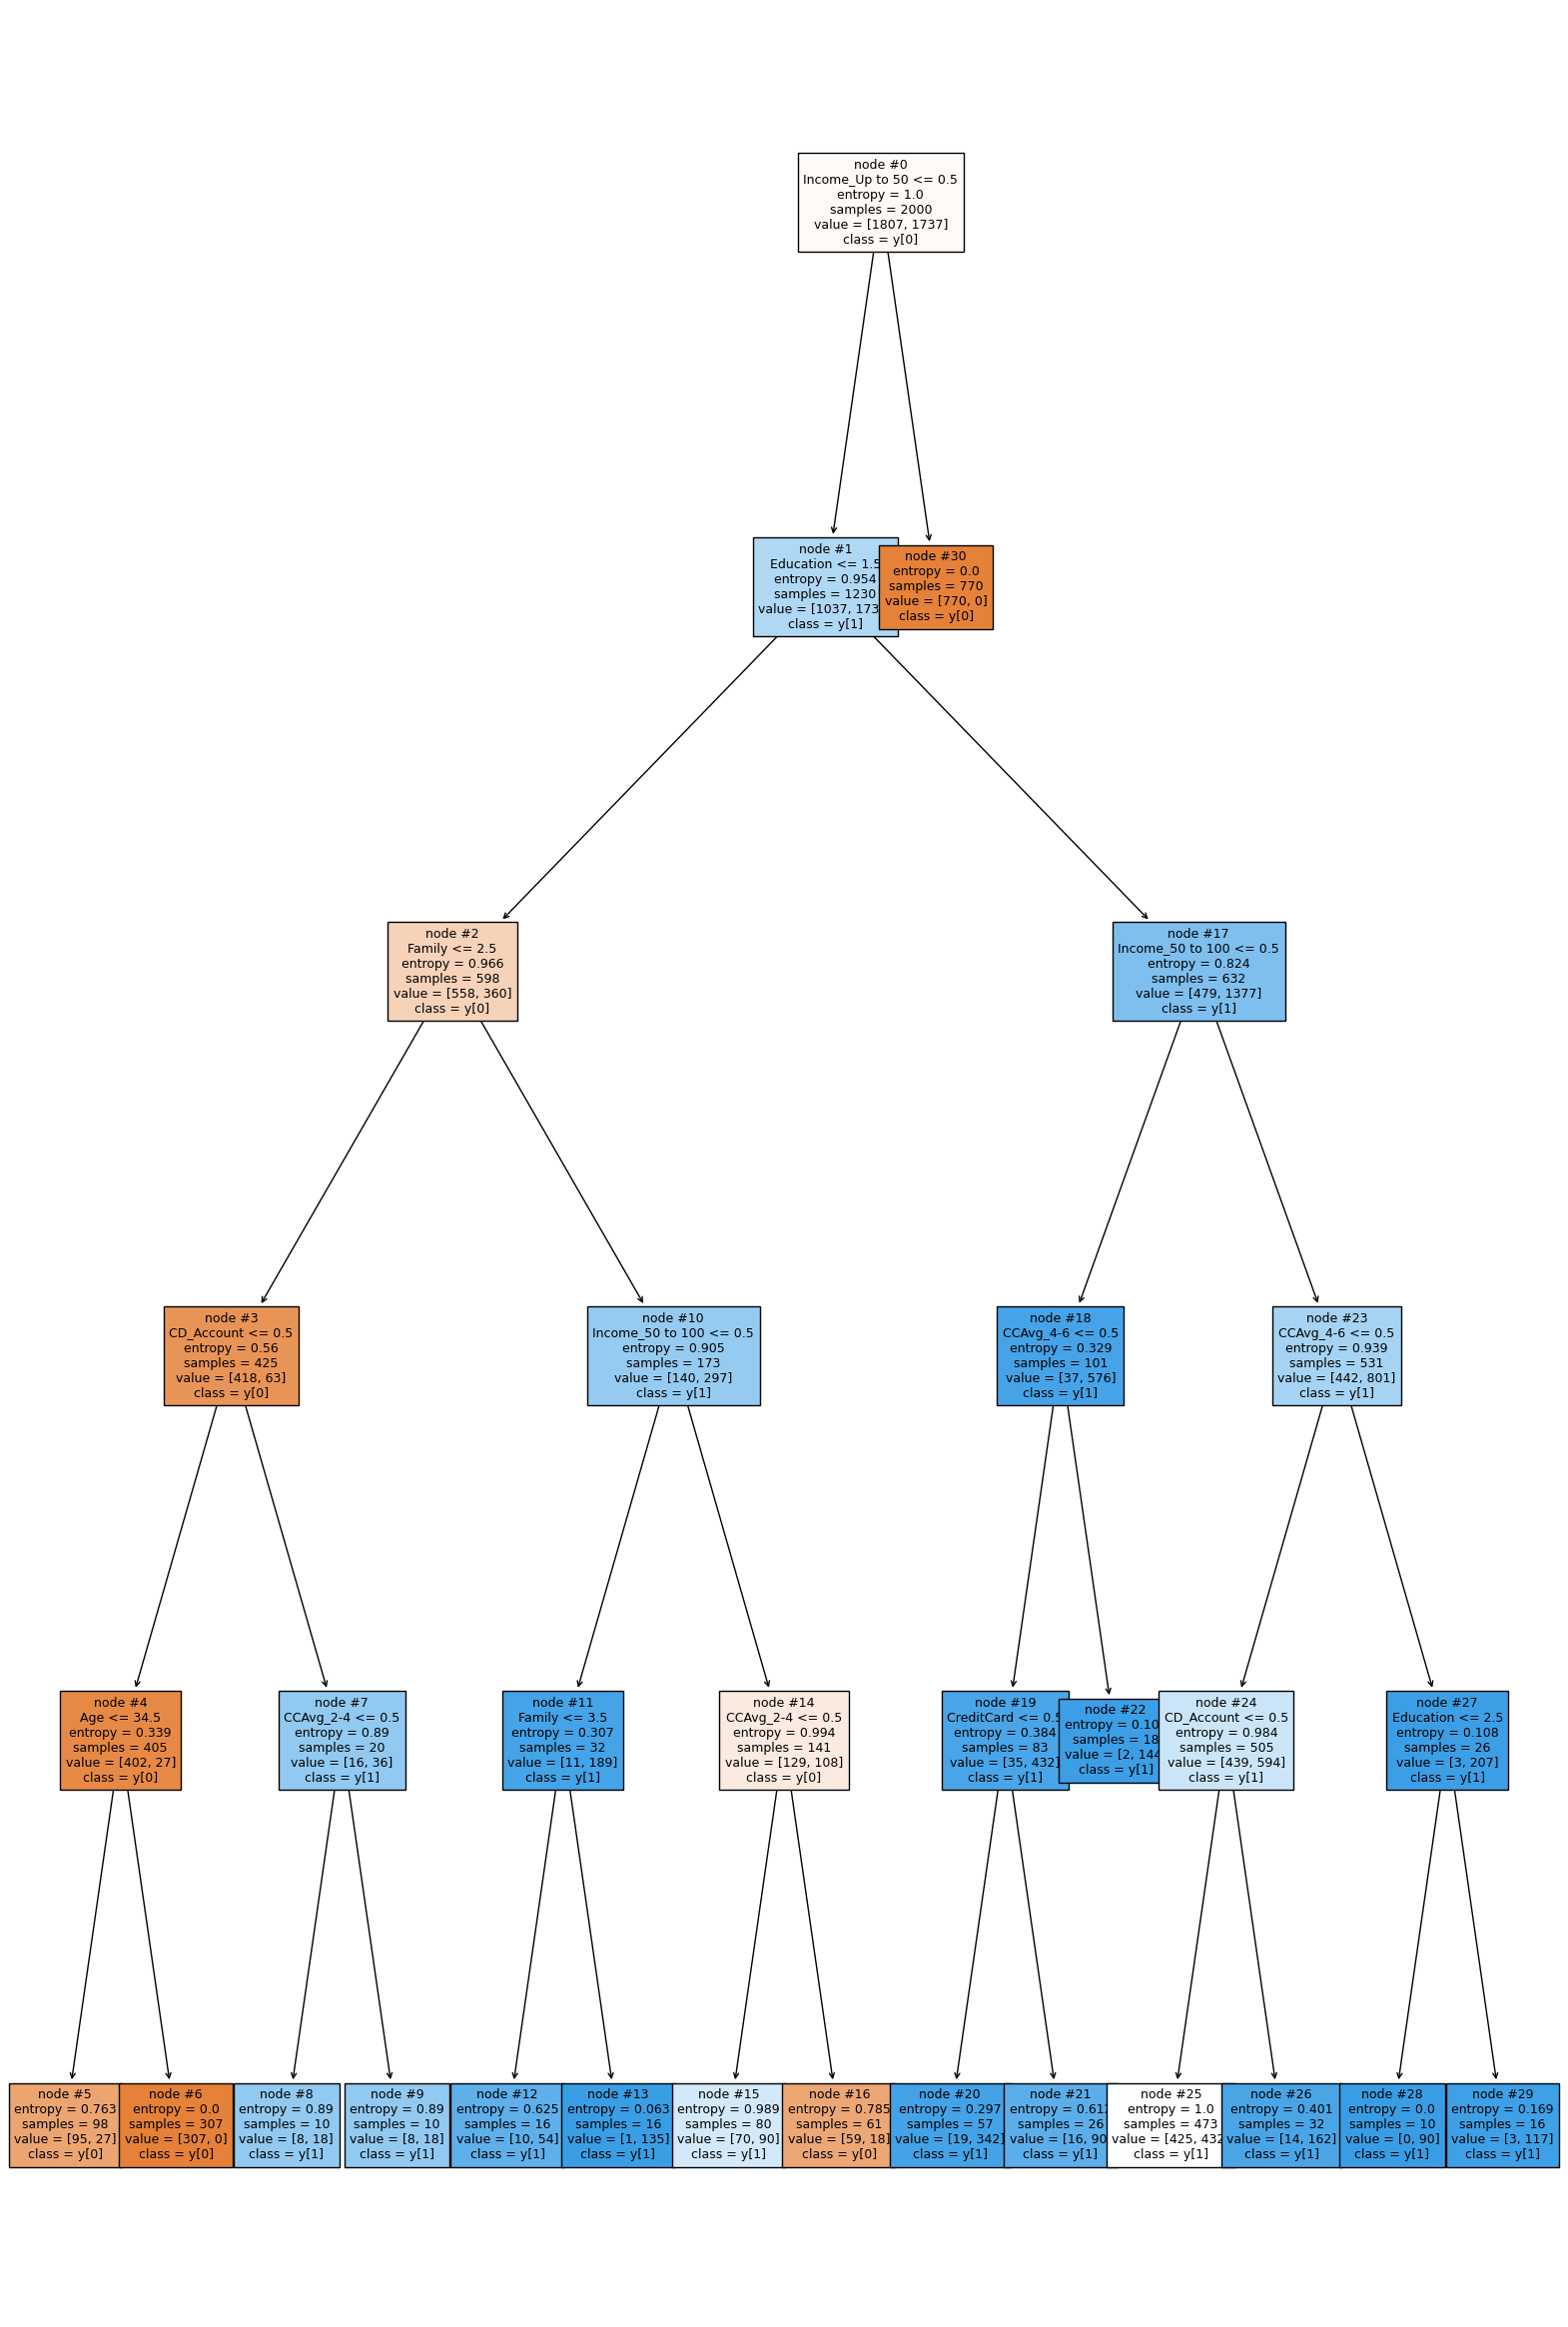

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

We have 14 terminal nodes (classes), and node #30 contains no further split with 770 samples.

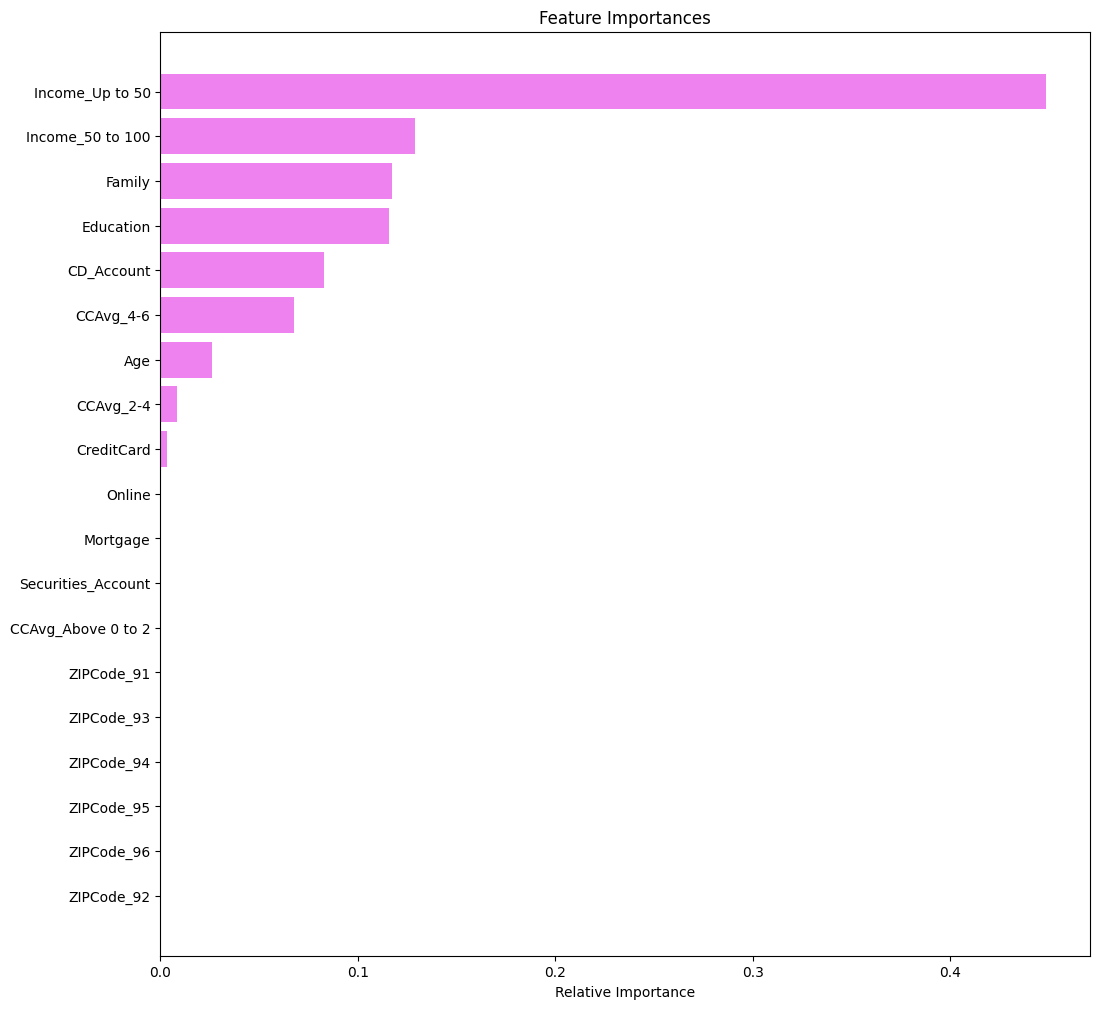

In [ ]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income_Up_to_50, Income_50 to 100, Family, Education, CD Account, CC_Avg 4-6, Age, CC_Avg_2-4  appear to be important factors in our model2.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income_Up to 50 <= 0.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 34.50
|   |   |   |   |   |--- weights: [95.00, 27.00] class: 0
|   |   |   |   |--- Age >  34.50
|   |   |   |   |   |--- weights: [307.00, 0.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- CCAvg_2-4 <= 0.50
|   |   |   |   |   |--- weights: [8.00, 18.00] class: 1
|   |   |   |   |--- CCAvg_2-4 >  0.50
|   |   |   |   |   |--- weights: [8.00, 18.00] class: 1
|   |   |--- Family >  2.50
|   |   |   |--- Income_50 to 100 <= 0.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [10.00, 54.00] class: 1
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [1.00, 135.00] class: 1
|   |   |   |--- Income_50 to 100 >  0.50
|   |   |   |   |--- CCAvg_2-4 <= 0.50
|   |   |   |   |   |--- weights: [70.00, 90.00] class: 1
|   |   |   |   |--- CCAvg_2-4 >  0.50
|   |   |   |   |   |--- weights

We have some attributes excluded completely in this model and some ZIPCode and CCAvg that show insignificant importance.


### Model Performance Improvement

**Model Improvement Model3 post-pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

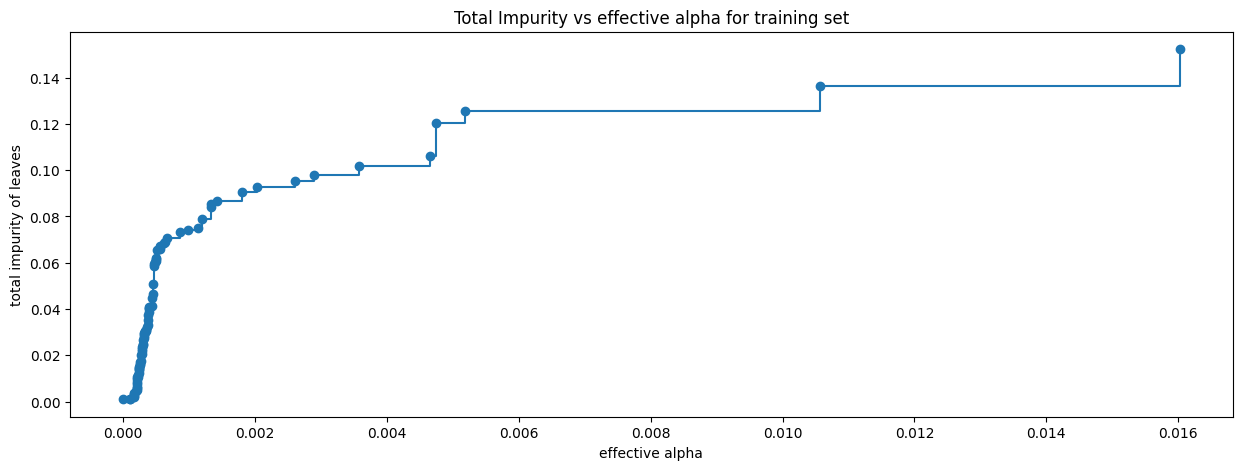

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We should examine the rightmost portion where the total impurity curve starts to rise. The optimal value of alpha would be just before this increase begins. The exact value is typically chosen as the alpha value where the impurity remains relatively low while avoiding overfitting. It appears to be in the 0.004-ish range (alpha)

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.02075732538050179


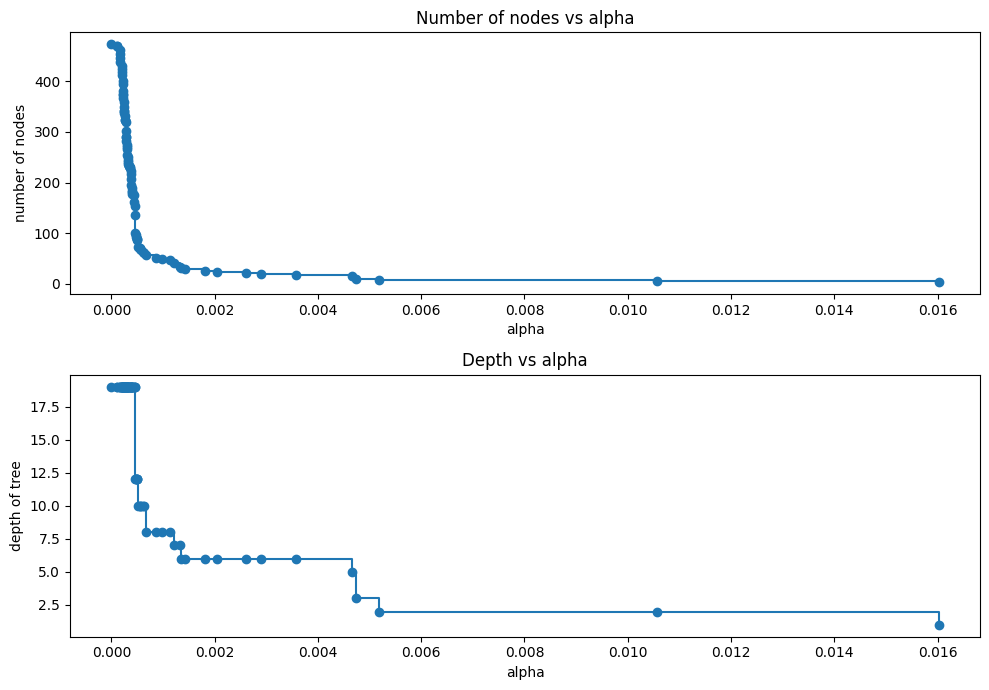

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Let's visualize the relationship between the complexity parameter (alpha) and two important characteristics of decision trees: the number of nodes and the depth of the tree.

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

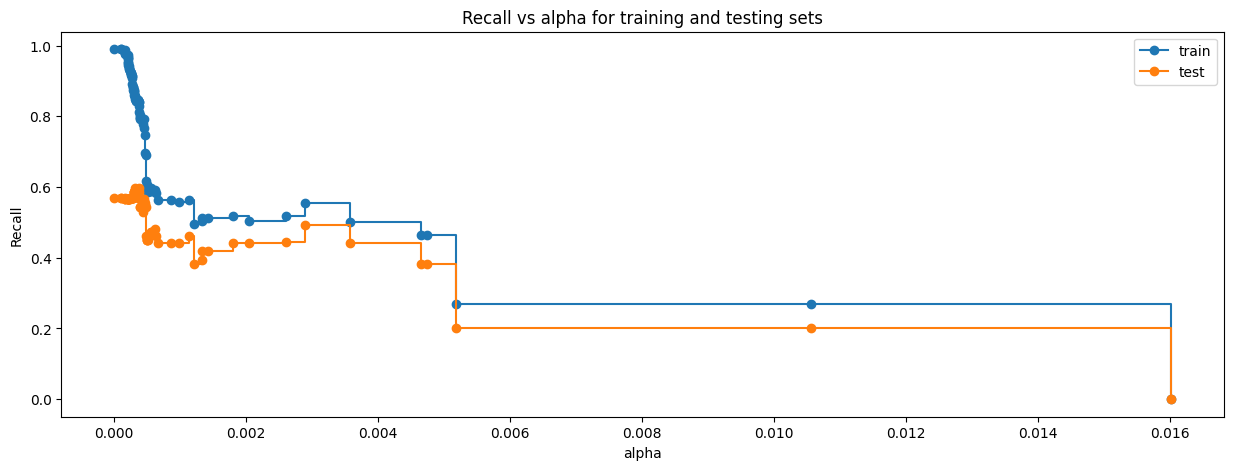

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The plot demonstrates how the recall metric changes with different values of alpha (CCP alpha) for both the training and testing sets. This shows how well the decision tree generalizes the unseen data. We are looking for a point on this curve where recall is reasonably high but not overfit to the training data. This point represents the best trade-off between model complexity and performance on the testing set.

It essential to assess the model's performance, especially recall, on our test data to ensure that it meets the criteria for good generalization.

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
model3 = clfs[index_best_model]
print(model3)

DecisionTreeClassifier(ccp_alpha=0.00031746031746031746, random_state=1)


In [ ]:
decision_tree_postpruned= model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_postpruned

,Accuracy,Recall,Precision,F1
0,0.984,0.857143,0.972332,0.911111


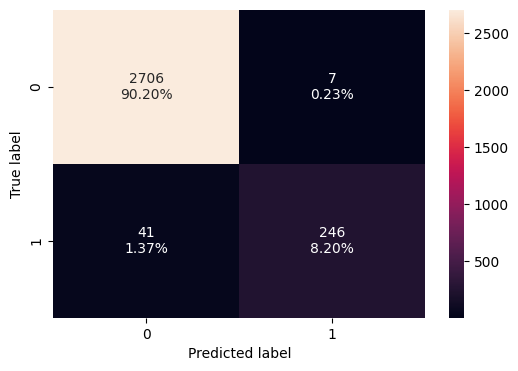

In [ ]:
confusion_matrix_sklearn(model3, X_train, y_train)

The training set here shows 41 FN and 7 FP. We see healtht results on our training data.

In [ ]:
decision_tree_postpruned_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_postpruned_test

,Accuracy,Recall,Precision,F1
0,0.93,0.595855,0.649718,0.621622


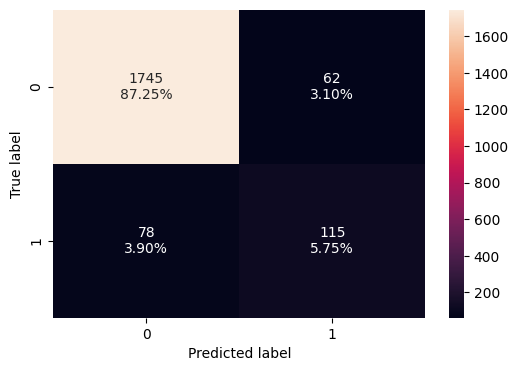

In [ ]:
confusion_matrix_sklearn(model3, X_test, y_test)

For the test set, 78 were FN and 62 were FP. 115 were TP and 1745 were TN.

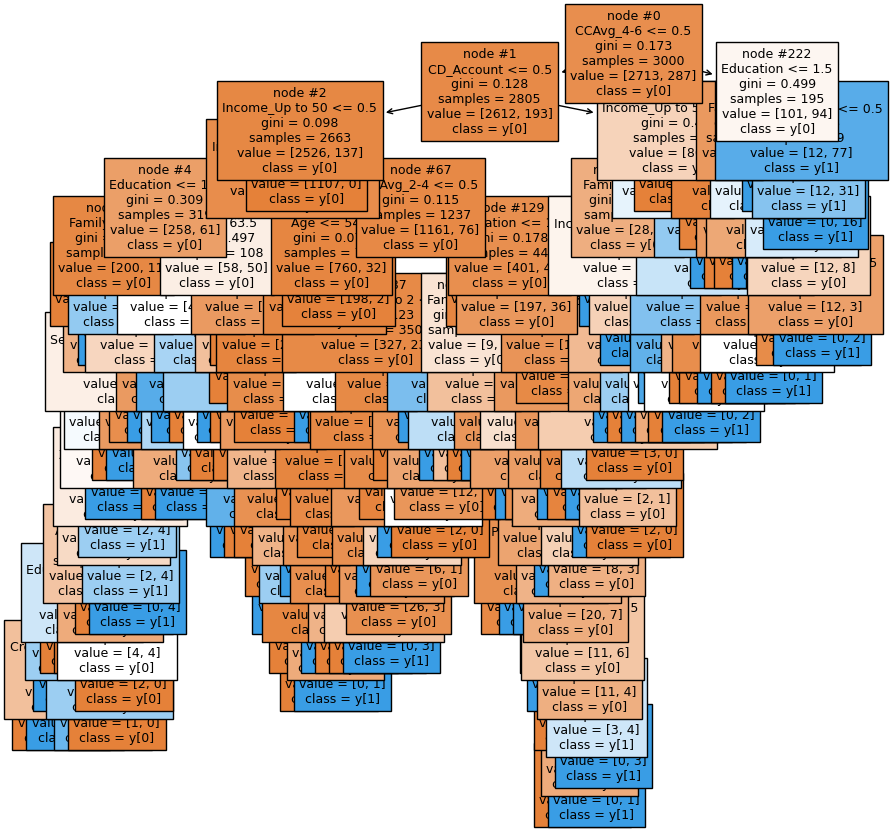

In [ ]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

The tree structure has too many branches and nodes, leading to excessive depth and intricacy. Since each node represents a feature or attribute, it contains many decision rules and splits, which can make it challenging to interpret and may not generalize well to new, unseen data.

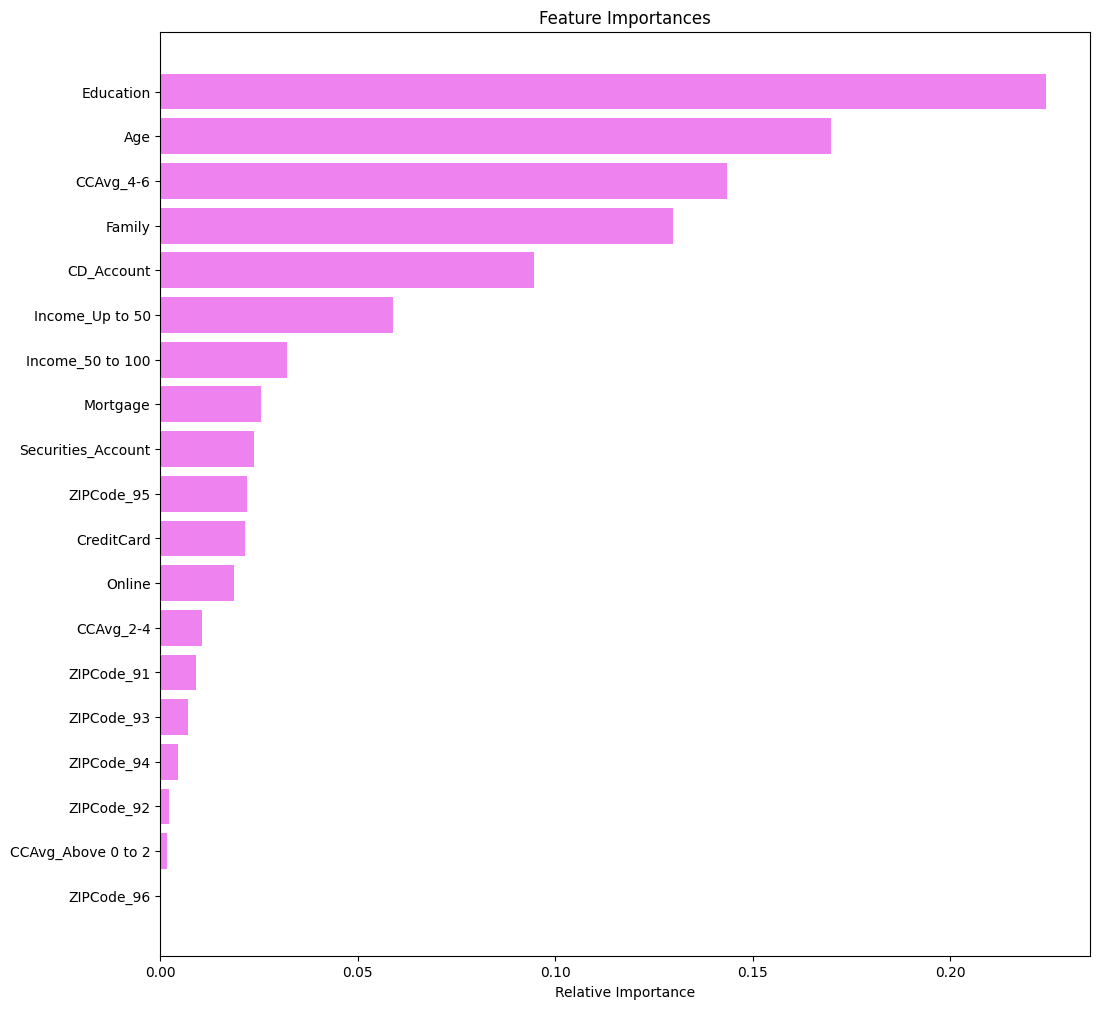

In [ ]:
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

We can determine from the above graph that multiple attributes were used for model3, with Education, Age and CC_Avg4-6 being the top 3 factors.

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model1_train.T,
        model2_train.T,
        decision_tree_postpruned.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.999000,0.877667,0.984000
Recall,0.989547,0.846690,0.857143
Precision,1.000000,0.429329,0.972332
F1,0.994746,0.569754,0.911111


In [ ]:
# test performance comparison

model_comp_test = pd.concat(
    [
        model1_test.T,
        model2_test.T,
        decision_tree_postpruned_test.T,
    ],
    axis=1,
)
model_comp_test.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
model_comp_test

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.999500,0.709500,0.930000
Recall,0.994819,0.974093,0.595855
Precision,1.000000,0.246073,0.649718
F1,0.997403,0.392894,0.621622


## Actionable Insights and Business Recommendations


Conclusion and Actionable Recommendations

In this project, we aimed to assist AllLife Bank in identifying potential customers with a higher probability of purchasing personal loans. Through data analysis and machine learning modeling, we gained several valuable insights and recommendations:

As a student embarking on my journey to construct decision tree models for market segmentation, I have derived valuable insights from Model2. This model, characterized by a specific set of decision rules, highlights the top five factors that significantly influence a customer's likelihood to accept personal loans:

Income: Customers with an income up to 50 are more inclined to decline personal loans, suggesting that lower income levels are associated with a reduced likelihood of loan acceptance.

CD_Account: Individuals who do not have a Certificate of Deposit (CD) account are less likely to accept personal loans, indicating that the absence of a CD account is linked to a lower probability of loan acceptance.

Education: Customers with an education level up to 1.50 are less inclined to take personal loans, implying that lower education levels correspond to a reduced likelihood of loan acceptance.

Family Size: Smaller families, typically those with up to 2.50 members, tend to decline personal loans, suggesting that smaller family sizes are associated with a decreased likelihood of loan acceptance.

Age: Younger customers, particularly those up to 34.50 years of age, are less likely to accept personal loans. T

These findings pave the way for crafting effective marketing strategies to target specific customer segments. However, it's crucial to address the recall aspect of this endeavor.

Understanding Recall:
Recall plays a pivotal role in this context. It quantifies our model's ability to correctly identify potential personal loan customers, ensuring that we don't miss out on any valuable opportunities.

In the case of Model2, while it provides valuable segmentation for marketing campaigns, the recall values for both testing (0.97) and training (0.84) datasets suggest our model is performing satisaftorily in this regard. Since the model is simplified and able to generalize satisfactorily on unseen data, it has potential to improve (F1 and Precision, specifically) with fine-tuning it further. This is in comparison to the over complex models we saw in Model1 and Model3.

Considering the recall and confusion matrix scores for Model2, it's essential to recognize both the challenges and opportunities associated with this model. My primary aim is to improve conversion rates, particularly the successful transformation of liability customers into personal loan customers while maintaining their status as depositors. To attain this objective, the critical task was the identification of customer segments with the greatest potential for a successful conversion.